In [64]:
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import pandas

# For partial dependence
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

In [65]:
# Load the model
model = joblib.load('../Models/healthinsurance_XGB_LE.pkl')

In [66]:
# Load the label encoder (adjust path if needed)
with open("../Models/encoder_dict.pkl", "rb") as f:
    le = pickle.load(f)

print("Label encoder loaded successfully!")


Label encoder loaded successfully!


In [67]:
import pandas as pd
data = pd.read_csv("../DataSet/healthinsurance.csv")

data_LE = pd.read_csv("../DataSet/RegressionData/healthinsurance_LE.csv")


In [68]:
X = data_LE.drop("claim", axis=1)
y = data_LE["claim"]

X.head()


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,60,1,64,24,8,1,0,55,72,0,0,2
1,49,0,75,22,8,1,0,5,78,1,1,16
2,32,0,64,17,4,2,1,63,88,1,1,0
3,61,0,53,36,8,1,1,64,72,1,0,10
4,19,0,50,20,8,0,0,8,82,1,0,22



Generating PDP for feature: age


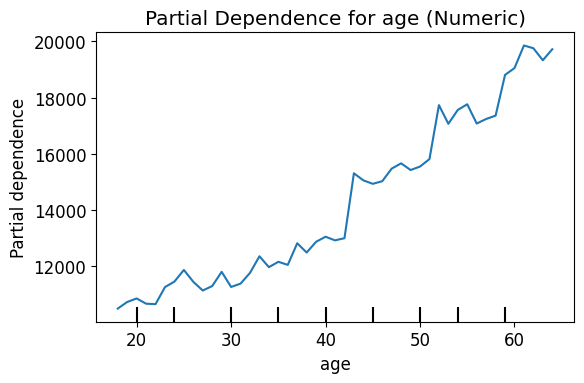


Generating PDP for feature: sex


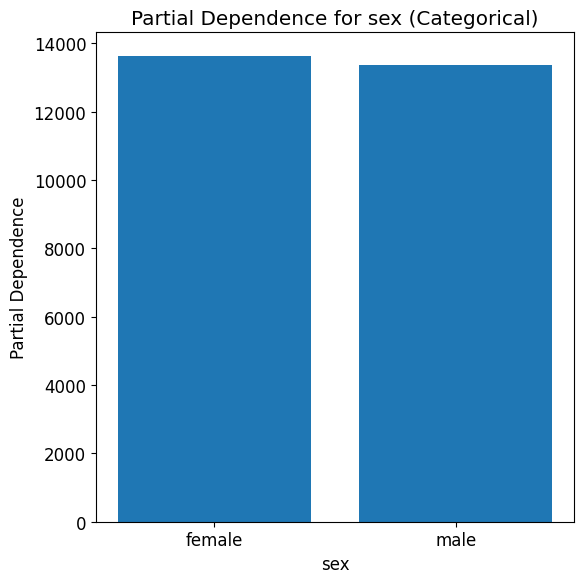


Generating PDP for feature: weight


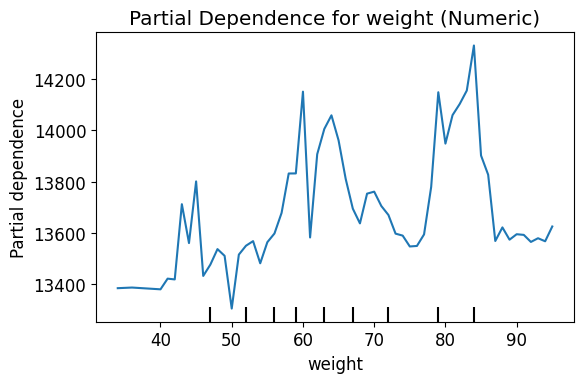


Generating PDP for feature: bmi


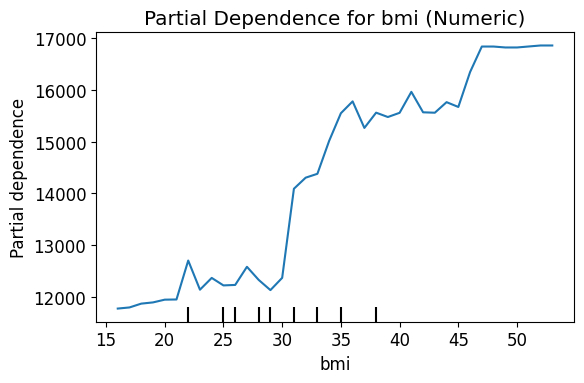


Generating PDP for feature: hereditary_diseases


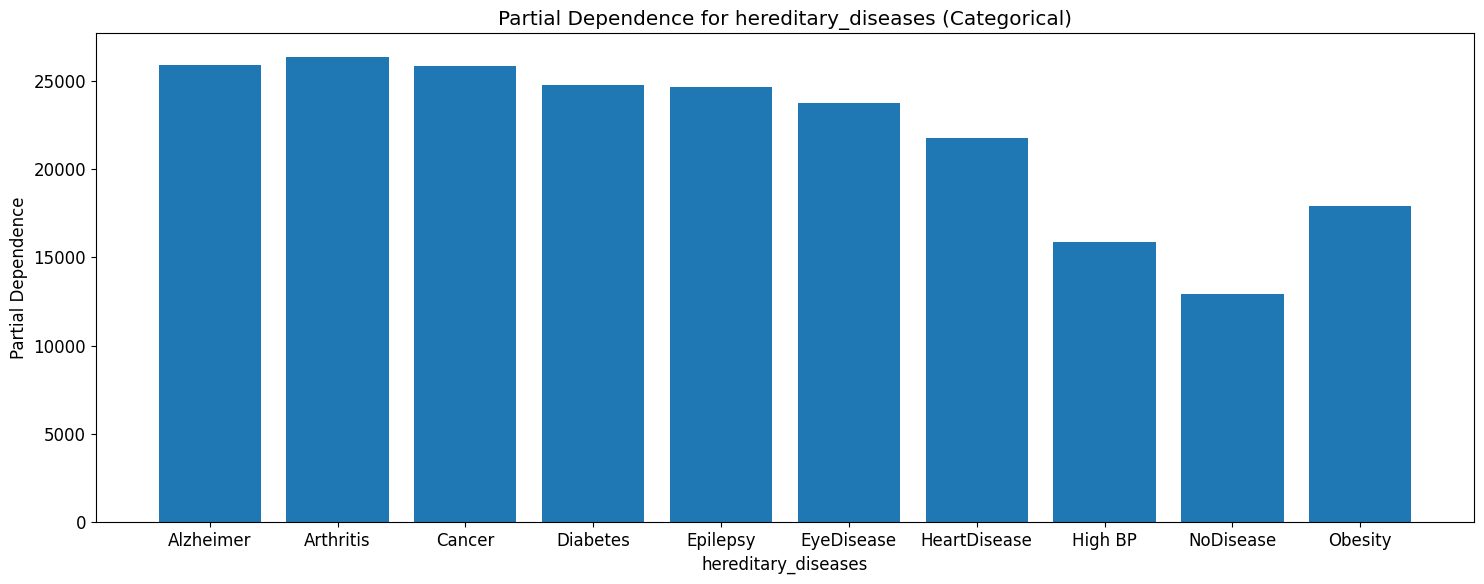


Generating PDP for feature: no_of_dependents


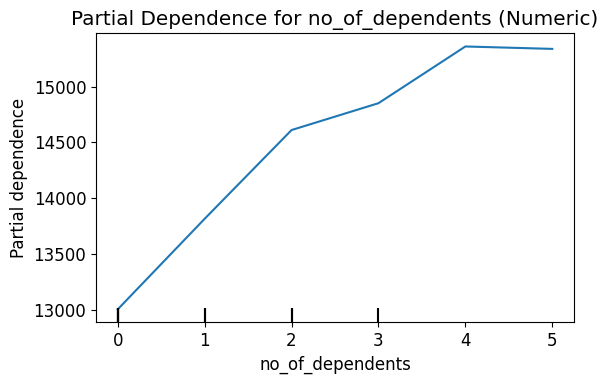


Generating PDP for feature: smoker


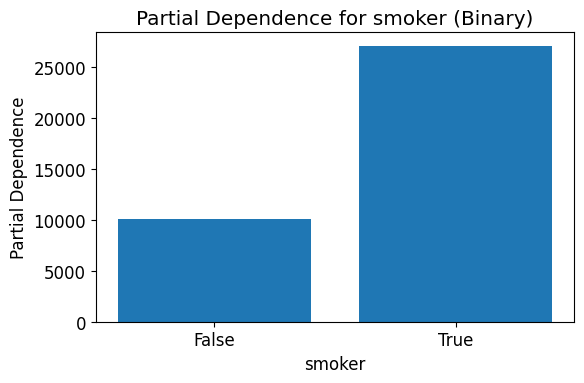


Generating PDP for feature: city


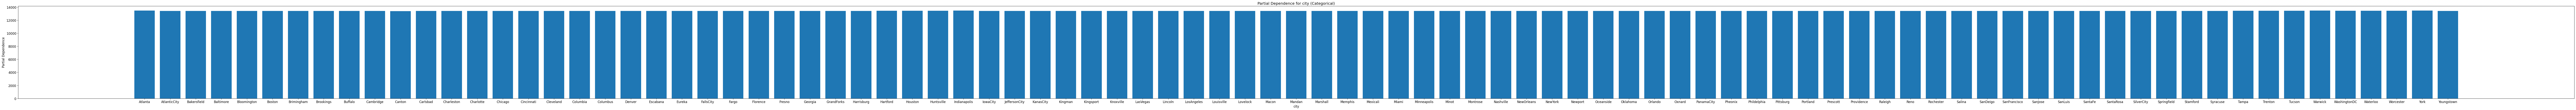


Generating PDP for feature: bloodpressure


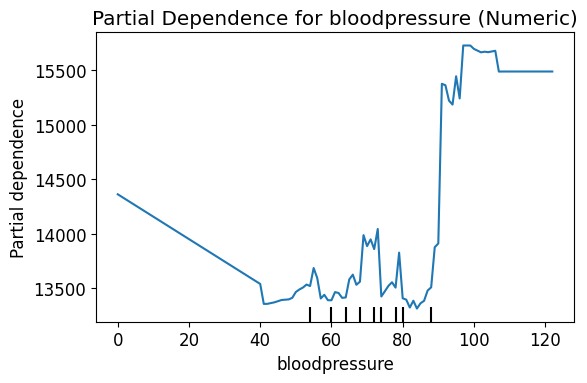


Generating PDP for feature: diabetes


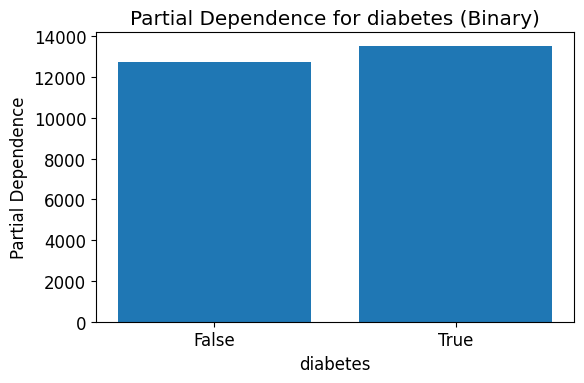


Generating PDP for feature: regular_ex


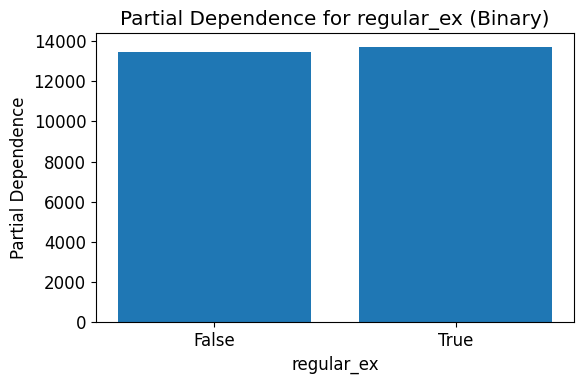


Generating PDP for feature: job_title


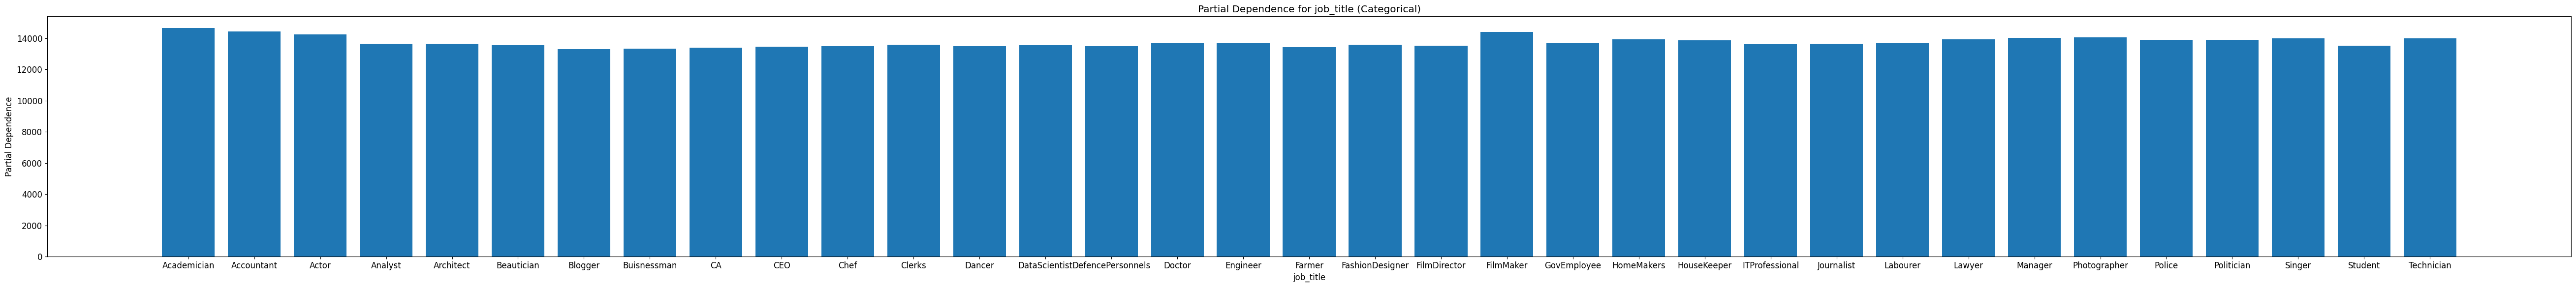

In [70]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import pickle

# Define categorical and binary features
categorical_features = ['hereditary_diseases', 'city', 'job_title', 'sex']
binary_features = ['smoker', 'regular_ex', 'diabetes']  # Features that should be displayed as True/False

# Load encoders for categorical features
with open('../Models/encoder_dict.pkl', 'rb') as file:
    encoder_dict = pickle.load(file)

# Loop over each feature in X
for feature in X.columns:
    print(f"\nGenerating PDP for feature: {feature}")
    
    if feature in categorical_features:
        # ---------------------------------------------------------
        # CATEGORICAL FEATURE: Create a BAR CHART using its own encoder
        # ---------------------------------------------------------
        encoder = encoder_dict[feature]
        mapping = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
        
        pdp_result = partial_dependence(
            estimator=xgb_model,
            X=X,
            features=[feature],
            kind='average',
            grid_resolution=13640
        )
        
        grid = pdp_result.get('values', [sorted(X[feature].unique())])[0]
        pdp_vals = pdp_result['average'][0]
        
        original_labels = [mapping.get(val, val) for val in grid]
        
        num_cats = len(original_labels)
        fig_width = max(6, num_cats * 1.5)
        plt.figure(figsize=(fig_width, 6))
        
        plt.bar(range(num_cats), pdp_vals, tick_label=original_labels)
        plt.title(f"Partial Dependence for {feature} (Categorical)")
        plt.xlabel(feature)
        plt.ylabel("Partial Dependence")
        plt.tight_layout()
        plt.show()
    
    elif feature in binary_features:
        # ---------------------------------------------------------
        # BINARY FEATURE: Map 0/1 to True/False in bar chart
        # ---------------------------------------------------------
        pdp_result = partial_dependence(
            estimator=xgb_model,
            X=X,
            features=[feature],
            kind='average',
            grid_resolution=13640
        )
        
        grid = [False, True]  # Explicitly define binary values
        pdp_vals = pdp_result['average'][0]
        
        plt.figure(figsize=(6, 4))
        plt.bar([0, 1], pdp_vals, tick_label=grid)
        plt.title(f"Partial Dependence for {feature} (Binary)")
        plt.xlabel(feature)
        plt.ylabel("Partial Dependence")
        plt.tight_layout()
        plt.show()
        
    else:
        # ---------------------------------------------------------
        # NUMERIC FEATURE: Use PartialDependenceDisplay (line chart)
        # ---------------------------------------------------------
        fig, ax = plt.subplots(figsize=(6, 4))
        disp = PartialDependenceDisplay.from_estimator(
            estimator=xgb_model,
            X=X,
            features=[feature],
            kind='average',
            ax=ax
        )
        plt.title(f"Partial Dependence for {feature} (Numeric)")
        plt.tight_layout()
        plt.show()

## Analysis:
- Diabetes seems really off 
- Also regular ex seems to not really make an impact

Possible Reasons:
- Sample does not represent the population
- Questionaire design